### Importing Model

In [22]:
import tensorflow as tf
import cv2
import imghdr
import matplotlib.pyplot as plt
import numpy as np
import os

In [23]:
model = tf.keras.models.load_model('imageclassifier_4.keras')

In [24]:
model

<Sequential name=sequential_6, built=True>

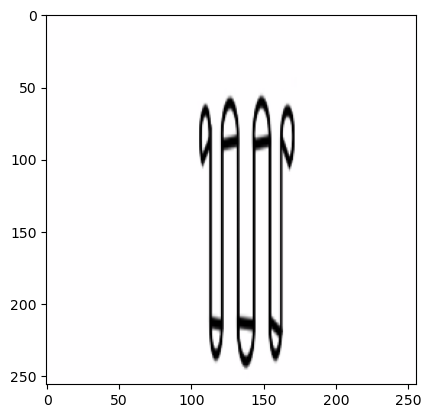

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Image belong to the Circular class


In [32]:
# Load and preprocess the image
img = cv2.imread('circ_cab2_big.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Predict the class
predict = model.predict(np.expand_dims(resize/255, 0))

class_names = ['Circular', 'Intersecting', 'Normal', 'Overlapping']
predicted_class = np.argmax(predict)

print(f'Image belong to the {class_names[predicted_class]} class')

### Bend Detection

In [33]:
model = tf.keras.models.load_model('imageclassifier_4.keras')
model

<Sequential name=sequential_6, built=True>

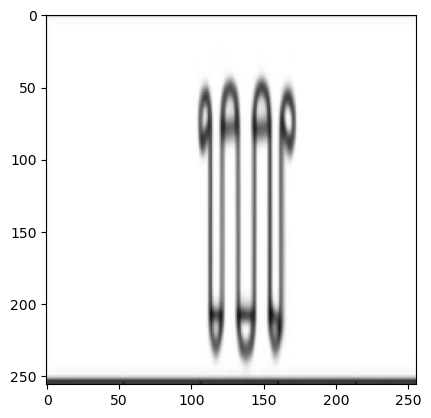

In [34]:
# Load and preprocess the image
img = cv2.imread('circ_cab2_upscaled.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [35]:
# Predict the class
predict = model.predict(np.expand_dims(resize / 255, 0))

class_names = ['Circular', 'Intersecting', 'Normal', 'Overlapping']
predicted_class = np.argmax(predict)

print(f'Image belong to the {class_names[predicted_class]} class')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
Image belong to the Circular class


Running bend detection for Circular class...
Number of bends found:  7


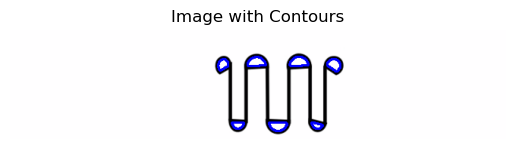

In [52]:
### Bend Detection
# Define separate functions for each class
def detect_bend_circular():
    # Bend detection code specific to the Circular class
    print("Running bend detection for Circular class...")
    # Read and convert the image to grayscale
    image_rgb = cv2.imread('circ_cab2_big.png')
    img = cv2.imread('circ_cab2_big.png', cv2.IMREAD_GRAYSCALE)

    # Thresholding to isolate the cable (adjust thresholds as needed)
    _, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)  # Adjust the lower threshold value

    # Morphological operations to enhance the bends
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))  # Rectangular kernel
    dilated = cv2.dilate(thresh, kernel, iterations=2)  # More iterations for stronger dilation
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Apply Gaussian blur to smooth out the edges
    # blurred = cv2.GaussianBlur(eroded, (5, 5), 0)

    # Find contours and hierarchy
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

    # More flexible contour filtering based on hierarchy
    filtered_contours = []
    for i, contour in enumerate(contours):
        # Check if contour is not the outermost (hierarchy level 0)
        if hierarchy[0][i][3] != -1:
            area = cv2.contourArea(contour)
            # Only keep contours within a reasonable area range to filter out noise
            if 10 < area < 610:  # Adjust these thresholds as needed
                filtered_contours.append(contour)

    print('Number of bends found: ', len(filtered_contours))

    # Draw remaining contours on the RGB version of the original image
    contour_image = image_rgb.copy()
    cv2.drawContours(contour_image, filtered_contours, -1, (255, 0, 0), 2)

    # Plot the final image with contours
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.title('Image with Contours')
    plt.axis('off')
    plt.show()


def detect_bend_intersecting():
    # Bend detection code specific to the Intersecting class
    print("Running bend detection for Intersecting class...")
    # Add your bend detection code here
    #...


def detect_bend_normal():
    # Bend detection code specific to the Normal class
    print("Running bend detection for Normal class...")
    # Add your bend detection code here
    #...


def detect_bend_overlapping():
    # Bend detection code specific to the Overlapping class
    print("Running bend detection for Overlapping class...")
    # Add your bend detection code here
    #...
    
# Call the corresponding function based on the predicted class
if predicted_class == 0:
    detect_bend_circular()
elif predicted_class == 1:
    detect_bend_intersecting()
elif predicted_class == 2:
    detect_bend_normal()
elif predicted_class == 3:
    detect_bend_overlapping()